<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
1. Factors that effect heart disease
2. Does heart disease depend on factors like age or diet.
3. Can we reduce the factors effecting heart disease for better health
## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [3]:
transfusion_csv = 'C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/transfusion.data'
data=pd.read_csv(transfusion_csv)


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
data.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x8e6a62f08>,
 'caps': [<matplotlib.lines.Line2D at 0x8e6a63ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x8e6a62448>],
 'medians': [<matplotlib.lines.Line2D at 0x8e6a68fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x8e6a6a9c8>],
 'means': []}

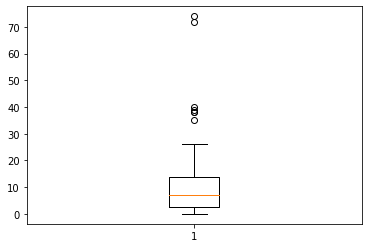

In [13]:
plt.boxplot(data['Recency (months)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x8e6db6ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x8e6dc1a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x8e6db6148>],
 'medians': [<matplotlib.lines.Line2D at 0x8e6dc5a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x8e6dc5b08>],
 'means': []}

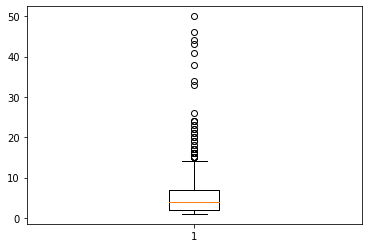

In [14]:
plt.boxplot(data['Frequency (times)'])

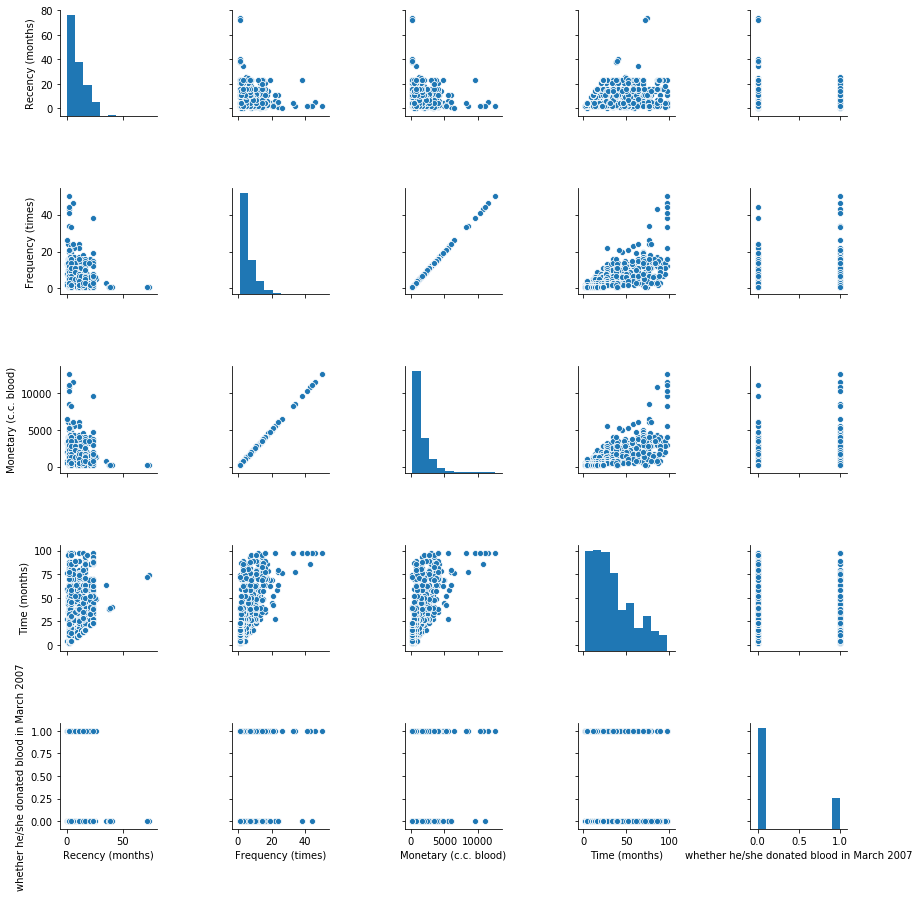

In [9]:
sns.pairplot(data)

In [15]:
data.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [20]:
#Input Variables
#X= data[:,:5]
#y=data[:,5]
predictors=['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
X=data[predictors]
#Output Variable
y=data['whether he/she donated blood in March 2007']



# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [22]:
clf = DecisionTreeClassifier(random_state=0)

# Step 9: Fit the Model

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [27]:
print('Training Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_test,y_test))

Training Score:  0.9381270903010034
Test Score:  0.66


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [29]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



